In [568]:
import sympy
sympy.init_printing()
import sympy.physics.units as U
import pylab
import numpy
%matplotlib notebook

In [488]:
M_g = sympy.Symbol('M_g',positive=True) # Mass of the entire galaxy
R_g = sympy.Symbol('R_g',positive=True) # Radius of the entire galaxy
M_bh = sympy.Symbol('M_{bh}',positive=True) # Mass fo the central black hole
tau = sympy.Symbol('tau',positive=True) # Mass loss time scale
v_w = sympy.Symbol('v_w',positive=True) # Wind velocity
G = sympy.Symbol('G',positive=True) # Gravitation constant
Lambda = sympy.Symbol('Lambda',positive=True) # Cooling function
mp = sympy.Symbol('m_p',positive=True) # Proton mass
me = sympy.Symbol('m_e',positive=True) # Electron mass
r0 = sympy.Symbol('r_0',positive=True) # Classical electron radius
alpha = sympy.Symbol('alpha', positive=True) # Fine structure constant
C = sympy.Symbol('C',positive=True) # Speed of light
Msol = 2e30*U.kg # Solar mass
parsec = 3.1e18*U.cm # parsec
erg = U.gram*(U.cm/U.second)**2
fiducial_parameters = {M_g:1.2e8*Msol,
                      M_bh:1e7*Msol,
                      R_g:15*parsec,
                      tau:1e11*U.year,
                      v_w:500*U.km/U.second,
                      G:6.7e-11*U.meter**3/U.kg/U.second**2,
                      Lambda:1e-22*erg*U.cm**3/U.second,
                      mp:1.6e-27*U.kg,
                      r0:3e-13*U.cm,
                      me:9e-31*U.kg,
                      C:3e8*U.meter/U.second,
                      alpha:sympy.Rational(1,137)}

Stagnation Radius

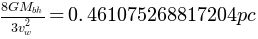

In [489]:
sym_pc = sympy.Symbol('pc')
r_stag = sympy.Rational(8,3)*G*M_bh/v_w**2
sympy.Eq(r_stag,r_stag.subs(fiducial_parameters)/parsec*sym_pc)

Analytic solution

In [490]:
tilde_r = sympy.Symbol(r'\tilde{r}') # Dimensionless radius
tilde_rho = 4*sympy.sqrt(6)/3/tilde_r**sympy.Rational(3,2) # Dimensionless density
tilde_u = sympy.sqrt(6)/4-1/sympy.sqrt(tilde_r) # Dimensionless velocity
tilde_c = sympy.sqrt(sympy.Rational(5,24)+sympy.Rational(1,3)/tilde_r)

Conversion to dimensional expression

In [491]:
eta = sympy.Symbol('eta')
D = sympy.Symbol('D')
r = sympy.Symbol('r', positive=True)
_ = D*(G*M_bh)**(1-eta)/v_w**(3-2*eta)*tilde_rho
_ = _.subs(tilde_r,r/(G*M_bh/v_w**2))
_ = _.subs(eta,sympy.Rational(5,2))
_ = _.subs(D,M_g/tau/R_g**3*R_g**sympy.Rational(5,2))
_ = sympy.expand_power_base(_,force=True).simplify()
analytic_density = _

In [492]:
_ = v_w*tilde_u
_ = _.subs(tilde_r,r/(G*M_bh/v_w**2))
analytic_velocity = _

In [493]:
_ = v_w*tilde_c
_ = _.subs(tilde_r,r/(G*M_bh/v_w**2))
analytic_sound_speed = _

First condition (that a fluid parcel spends enough time at a certain radius to radiate a considerable portion of its energy)

In [494]:
v = sympy.Symbol('v')
c = sympy.Symbol('c')
rho = sympy.Symbol('rho')
cc1 = r/v>mp**2*c**2/(rho*Lambda)

Let's examine the behaviour in the limit $r \rightarrow \infty$

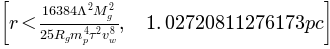

In [495]:
xi = sympy.Symbol('xi',positive=True)
_ = cc1
_ = _.subs(v,analytic_velocity.series(r,sympy.oo,sympy.Rational(1,2)).removeO())
_ = _.subs(c,analytic_sound_speed.series(r,sympy.oo,sympy.Rational(1,2)).removeO())
_ = _.subs(rho,analytic_density)
aux = sympy.solve(sympy.Eq(_.lhs,_.rhs),r)[0]
_ = _.subs(r,xi*aux)
_ = _.canonical
_ = sympy.expand_power_base(_.lhs/_.rhs)<1
_ = sympy.solve(_,xi)
_ = _.subs(xi,r/aux)
cc1_far = sympy.solve(_,r)
[cc1_far,cc1_far.rhs.subs(fiducial_parameters)*sym_pc/parsec]

We repeat the analysis for the limit $r \rightarrow 0$

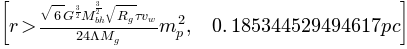

In [496]:
_ = cc1
_ = _.subs(v,-analytic_velocity.series(r,0,0).removeO())
_ = _.subs(c,analytic_sound_speed.series(r,0,0).removeO())
_ = _.subs(rho,analytic_density)
aux = sympy.solve(sympy.Eq(_.lhs,_.rhs),r)[0]
_ = _.canonical
_ = _.subs(r,xi*aux)
_ = sympy.solve(_.lhs/_.rhs < 1)
cc1_near = sympy.solve(_.subs(xi,r/aux),r)
[cc1_near,cc1_near.rhs.subs(fiducial_parameters).n()*sym_pc/parsec]

We can also do a more accurate calculation

<IPython.core.display.Javascript object>


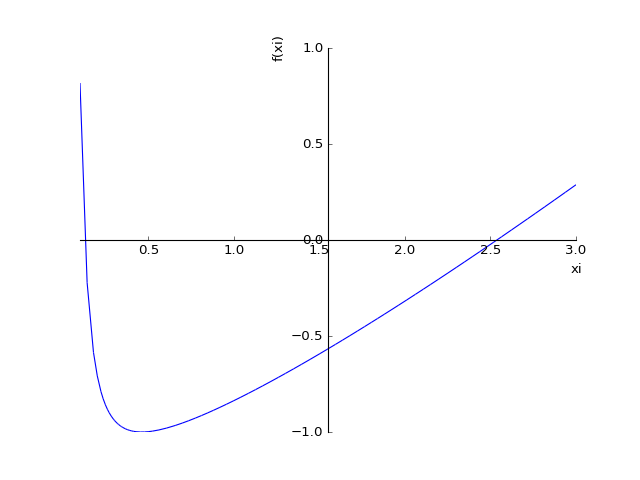

 mpf('0.12821019418117487'),
 mpf('2.5373246402768149')]

In [497]:
_ = cc1
_ = (_.rhs/_.lhs)**2
_ = _.subs(v,analytic_velocity)
_ = _.subs(rho,analytic_density)
_ = _.subs(c,analytic_sound_speed)
_ = _.subs(fiducial_parameters)
_ = _.subs(r,xi*parsec)
_ = _.simplify()
[sympy.plot(_-1,(xi,0.1,3)), sympy.nsolve(_-1,0.1),sympy.nsolve(_-1,5)]

Second cooling condition: Cooling should be faster then wind heating

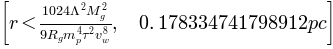

In [498]:
q = sympy.Symbol('q')
cc2 = rho**2*Lambda/mp**2>q*v_w**2
_ = cc2
_ = _.subs(rho,analytic_density)
_ = _.subs(q,M_g/tau/R_g**3*(r/R_g)**(-sympy.Rational(5,2)))
aux = sympy.solve(_.lhs/_.rhs-1,r)[0]
_ = _.canonical
_ = sympy.solve((_.lhs/_.rhs).subs(r,xi*aux)<1,xi)
_ = sympy.solve(_.subs(xi,r/aux),r)
[_,_.rhs.subs(fiducial_parameters)*sym_pc/parsec]

Calculation of optical depth

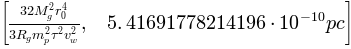

In [499]:
_ = r0**2*(rho/mp)*r
_ = _.subs(rho,analytic_density)
_ = sympy.solve(_-1,r)[0]
[_,_.subs(fiducial_parameters)*sym_pc/parsec] 

Bremsstrahlung emissivity

In [502]:
k = sympy.Symbol('k') # Boltzmann contant
T = sympy.Symbol('T') # Temperature
e = sympy.Symbol('e',positive=True) # Photon energy
bse = alpha*(me*C**3/r0**4)*sympy.sqrt(me*C**2/(k*T))*(r0**3*rho/mp)**2*sympy.exp(-e/k/T)

Bremsstrahlung specturm - contribution from shells outside the stagnation radius

<IPython.core.display.Javascript object>


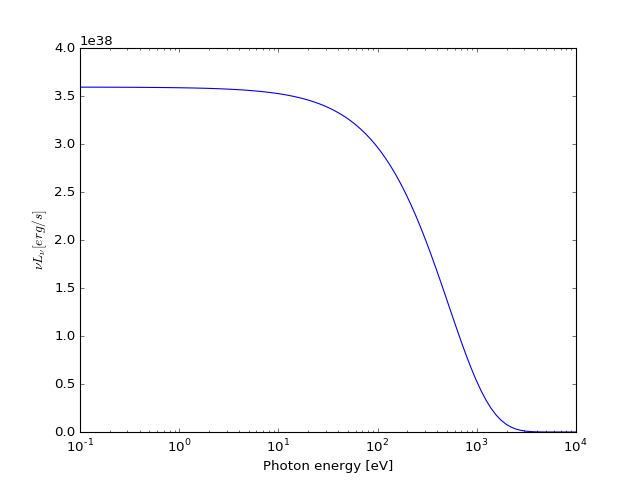

In [648]:
dr = sympy.Symbol('dr')
dxi = sympy.Symbol(r'd \xi')
tilde_e = sympy.Symbol(r'\tilde{e}',positive=True)
_ = bse
_ = _.subs(rho,analytic_density)
_ = _.subs(T,mp*c**2/k)
_ = _.subs(c,analytic_sound_speed.series(r,sympy.oo,1).removeO())
_ = _*r**2
_ = _.integrate((r,r_stag,R_g))
_ = _.subs(fiducial_parameters)
_ = _.subs(e,tilde_e*U.eV)
_ = _/(erg/U.second)
_ = _.simplify()
tilde_e_list = numpy.logspace(-1,4,100)
f = sympy.lambdify(tilde_e,_,numpy)
nulnu_list = f(tilde_e_list)
pylab.semilogx(tilde_e_list, nulnu_list)
pylab.xlabel('Photon energy [eV]')
pylab.ylabel(r'$\nu L_{\nu} [erg/s]$')

Bremsstrahlung specturm - contribution from shells inside the stagnation radius

<IPython.core.display.Javascript object>


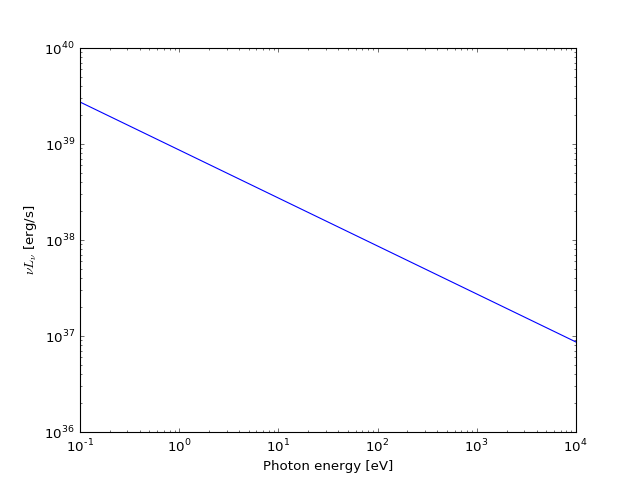

In [653]:
_ = bse
_ = bse*r**3
_ = _.subs(rho,analytic_density)
_ = _.subs(T,mp*c**2/k)
_ = _.subs(c,analytic_sound_speed.series(r,0,0).removeO())
aux = sympy.solve(-e*sympy.log(_).diff(e)-xi,r)[0]
_ = _.subs(r,aux)
_ = _.subs(fiducial_parameters)
_ = _.subs(xi,1)
_ = _.subs(e,tilde_e*U.eV)
_ = _/(erg/U.second)
f = sympy.lambdify(tilde_e,_,numpy)
nulnu_list = f(tilde_e_list)
pylab.loglog(tilde_e_list, nulnu_list)
pylab.xlabel('Photon energy [eV]')
pylab.ylabel(r'$\nu L_{\nu}$ [erg/s]')